#### DATA ACQUISITION

<br>

## Chocolate Scraping with Beautiful Soup

The data is displayed in a table on Codecademy's [Cocao Ratings Website](https://content.codecademy.com/courses/beautifulsoup/cacao/index.html), not a `csv` or `json`.

### Tasks

<hr>

- Where are the best cocao beans grown?
- Which countries produce the highest-rated bars?
- What's the relationship between cocao solids percentage and rating?
- Bonus: Which countries produce the highest-rated bars?

<hr>

### Make Some Chocolate Soup

In [2]:
#this is an import from codecademy so it will cause an error
#import codecademylib3_seaborn
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')
soup = BeautifulSoup(webpage.content, 'html.parser')
#print(soup)

### How are ratings distributed?

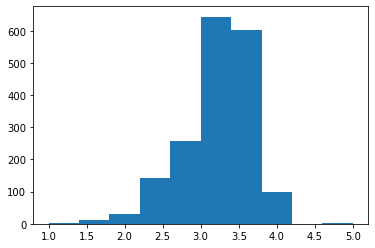

In [3]:
ratings = []
rating_numbers = soup.find_all(attrs = {'class': 'Rating'})
#print(rating_numbers)
for number in rating_numbers:
  new_number = number.get_text()
  if new_number != "Rating":
    #print(new_number)
    ratings.append(float(new_number))
#print(ratings)

plt.hist(ratings)
plt.show()

### Which chocolatier makes the best chocolate?

In [4]:
company_names = []
companies = soup.select(".Company")
#print(companies)
for c in companies[1:]:
  company_names.append(c.get_text())
#print(company_names)

new_dict = {'Company': company_names, 'Rating': ratings}
#print(new_dict)
df = pd.DataFrame.from_dict(new_dict)
mean_ratings = df.groupby("Company").Rating.mean()
ten_best = mean_ratings.nlargest(10)
print(ten_best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Idilio (Felchlin)                       3.775000
Acalli                                  3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


### Is more cacao better?

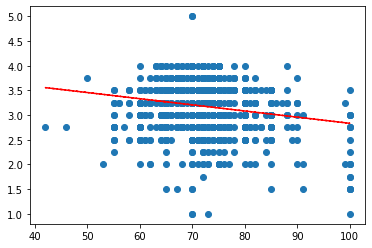

In [5]:
cocoa_percent = []
cocoa_numbers = soup.select(".CocoaPercent")
#print(cocoa_numbers)
for cocoa in cocoa_numbers[1:]:
  new_cocoa = cocoa.get_text()
  new_cocoa = new_cocoa.replace("%", " ")
  #print(new_cocoa)
  cocoa_percent.append(int(float(new_cocoa)))
#print(cocoa_percent)

new_dict["CocoaPercentage"] = cocoa_percent
df = pd.DataFrame.from_dict(new_dict)
#print(df)

plt.clf()
plt.scatter(df.CocoaPercentage, df.Rating)

z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()

### Bonus: Which countries have the highest-rated bars?

In [6]:
company_location = []
countries = soup.select('.CompanyLocation')
#print(countries)
for country in countries[1:]:
  #print(country)
  company_location.append(country.get_text())
#print(company_location)

new_dict["CompanyLocation"] = company_location
df = pd.DataFrame.from_dict(new_dict)
#print(df)
#df.sort_values("CompanyLocation", inplace = True)
#df["Rating"] = df["CompanyLocation"].rank(method = 'max')
#print(df)
group_company = df.groupby("CompanyLocation").Rating.max()
print(group_company.sort_values(ascending = False))

CompanyLocation
Italy                5.00
U.S.A.               4.00
Spain                4.00
Germany              4.00
Scotland             4.00
Sao Tome             4.00
Switzerland          4.00
U.K.                 4.00
Ecuador              4.00
France               4.00
Colombia             4.00
Canada               4.00
Brazil               4.00
Madagascar           4.00
Belgium              4.00
Australia            4.00
Guatemala            4.00
Argentina            3.75
Hungary              3.75
Israel               3.75
Lithuania            3.75
Poland               3.75
Iceland              3.75
Amsterdam            3.75
Singapore            3.75
New Zealand          3.75
Denmark              3.75
Venezuela            3.75
Vietnam              3.75
Chile                3.75
Bolivia              3.75
Austria              3.75
South Korea          3.50
Sweden               3.50
Philippines          3.50
Peru                 3.50
Japan                3.50
Finland              3